# 16_4 Moving Average

이번 챕터에서는 시계열 분석에서 자주 사용되는 moving average에 대해서 알아보겠습니다. moving average는 일정 크기의 윈도우로 시계열 데이터의 평균을 내는 기법입니다. 단순한 형태의 moving average와 최근 데이터에 가중치를 두는 exponentially weighted movign average 기법을 배워보겠습니다.

## 데이터 셋 준비

In [122]:
import pandas as pd

df = pd.read_csv("./data/AirPassengers.csv", index_col="Month", parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## 이동 평균법

simple moving average라고도 부릅니다. 현재 시점을 기준으로 일정 크기의 윈도우 크기 만큼 평균 값을 구하면 됩니다.

$$SMA_{k}=\frac{p_{n-k+1}+p_{n-k+2}+...+p_{n}}{k}$$

### SMA 계산

In [123]:
df["SMA 6"]= df["Passengers"].rolling(window=6).mean()
df["SMA 12"]= df["Passengers"].rolling(window=12).mean()

### 결과 시각화

<Axes: xlabel='Month'>

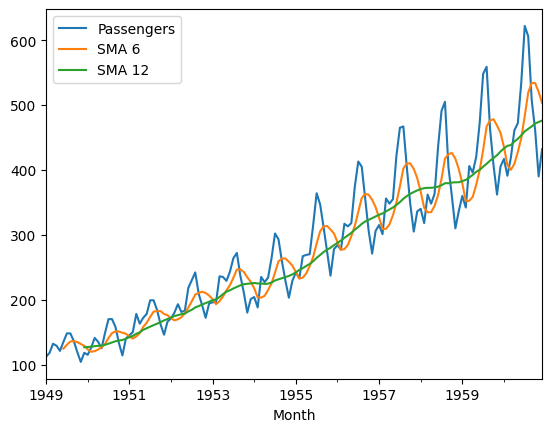

In [124]:
df[["Passengers", "SMA 6", "SMA 12"]].plot()

## EWMA 

exponentially weighted moving average는 최근 값에 가중치를 주는 또 다른 방식입니다. EWMA는 가장 최근 데이터의 가중치를 처음에 1로 두고, (1-α) 만큼 계속 곱해줍니다. 이런 기법을 exponential smoothing 이라고 부릅니다.

$$EWMA_{t}=\alpha*y_{t}+(1-\alpha)*EWMA_{t-1}$$

exponentially weighted인 이유는 현재 시점으로부터 멀어질 수록 가중치가 급격하게 감소하기 때문입니다.

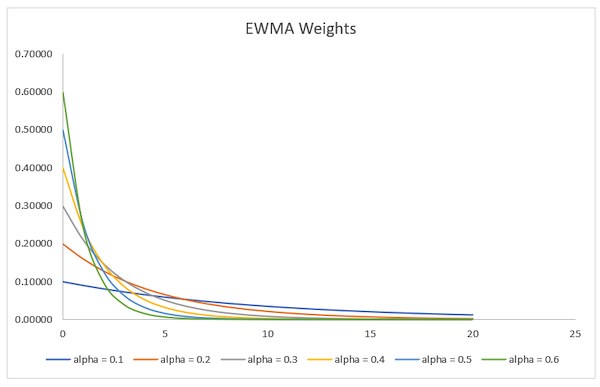

### EWMA 계산

Series.ewm 함수를 이용해서 손쉽게 EWMA를 계산할 수 있습니다. 윈도우의 크기를 지정하면 alpha 값은 자동으로 지정됩니다.

$$\alpha=2/(span+1)$$

In [125]:
df["EWMA 6"] = df["Passengers"].ewm(span=6).mean()
df["EWMA 12"] = df["Passengers"].ewm(span=12).mean()

### 결과 시각화

<Axes: xlabel='Month'>

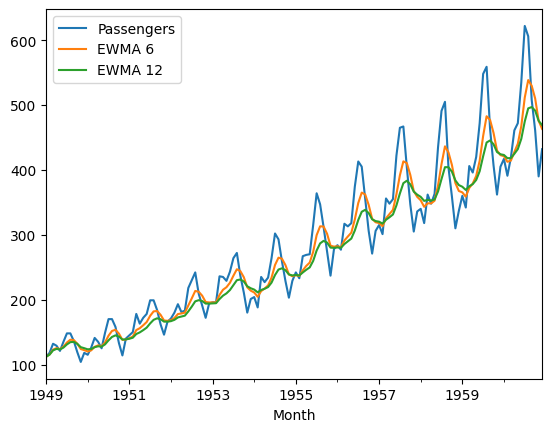

In [126]:
df[["Passengers", "EWMA 6", "EWMA 12"]].plot()

## 성능 비교

시계열 예측 모델이 얼마나 정확히 예측을 해냈는지 RMSE를 이용하여 측정해보겠습니다. 사실 SWA나 EWMA나 모두 계산시에 현재 시점의 값을 포함해서 계산했기 때문에 성능을 측정하는 것이 큰 의미가 없습니다. 여기서는 시계열 예측 모델의 성능은 이렇게 측정하는 구나 정도만 익히고 넘어가겠습니다.

In [127]:
from sklearn.metrics import mean_squared_error

def calculate_rmse(df, target_column):
    cur_df = df[["Passengers", target_column]].dropna()
    return mean_squared_error(cur_df["Passengers"], cur_df[target_column], squared=False)

In [128]:
target_columns = ["SMA 6", "SMA 12", "EWMA 6", "EWMA 12"]
for target_column in target_columns:
    rmse = calculate_rmse(df, target_column)
    print(f"{target_column} RMSE: {round(rmse, 4)}")

SMA 6 RMSE: 45.7355
SMA 12 RMSE: 48.0092
EWMA 6 RMSE: 32.8253
EWMA 12 RMSE: 41.3127


## 정리

이번 챕터에서는 아주 단순한 형태의 시계열 예측 모델을 만들어 보았습니다. 사실 이 모델들은 실제 적용하기에는 성능이 떨어지므로, 간단히 개념 정도만 숙지하고 넘어가겠습니다. 본격적인 시계열 예측 모델들은 이어지는 챕터들에서 배워보겠습니다.